In [1]:
%pip install seaborn

In [35]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

In [43]:
warnings.filterwarnings("ignore")

In [44]:
df = pd.read_csv("CarPrice.csv.txt")

In [62]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [46]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [47]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [48]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [50]:
df = df.dropna()

In [51]:
df = df.drop_duplicates()

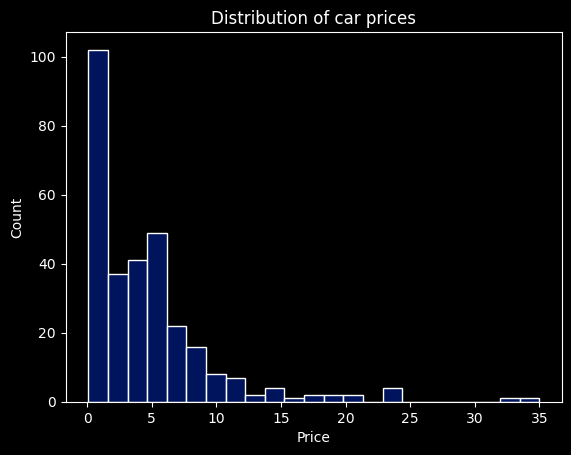

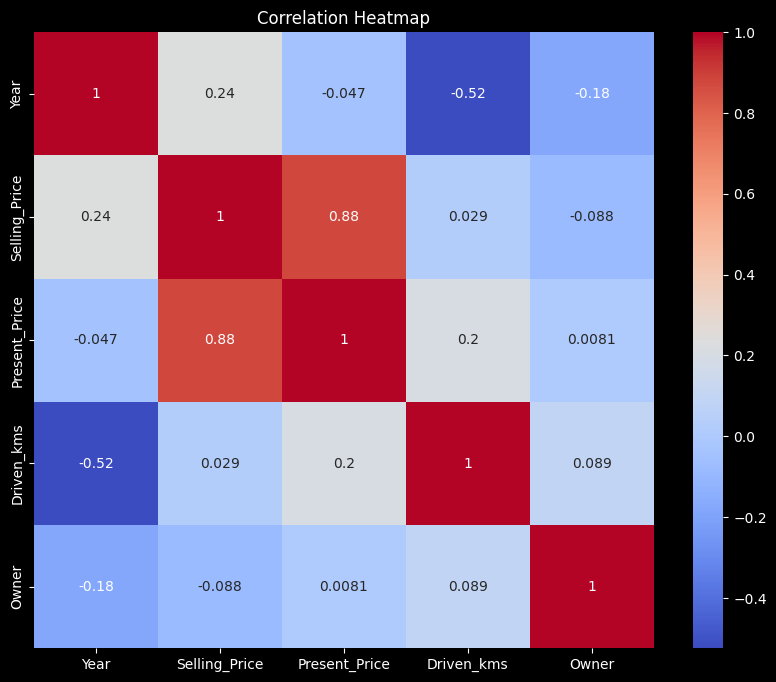

In [73]:
plt.style.use('dark_background')
sns.set_palette("dark")
sns.histplot(data['Selling_Price'])
plt.title('Distribution of car prices', color = 'white')
plt.xlabel('Price', color = 'white')
plt.ylabel('Count', color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.show()

# Correlation Heatmap
numeric_features = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
correlation_matrix = data[numeric_features].corr()
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap', color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.show()

In [74]:
feature_cols = (['Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'])
target_col = (['Selling_Price'])
x = df[feature_cols]
y = df[target_col]

In [86]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
label_encoder = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object' :
        x[col] = label_encoder.fit_transform(x[col])

In [102]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming x and y are your feature and target variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)


LinearRegression()

In [104]:
import numpy as np
from sklearn.metrics import mean_squared_error
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error", rmse)

Root Mean Squared Error 6.555652074234952e-12


In [107]:
import pandas as pd

# Assuming you have a trained model named 'model' and a DataFrame named 'x_train'
# Replace 'model' and 'x_train' with your actual model and training data

new_car_data = [['ritz', 2014, 3.35, 5.59, 27000, 'Petrol', 'Dealer', 'Manual', 0]]
feature_cols = ['Car_Name','Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
new_car_df = pd.DataFrame(new_car_data, columns=feature_cols)
new_data_encoded = pd.get_dummies(new_car_df, drop_first=True)

# Assuming 'x_train' is a DataFrame, replace it with your actual training data columns
new_data_encoded = new_data_encoded.reindex(columns=x_train.columns, fill_value=0)

predicted_price = model.predict(new_data_encoded)
predicted_price_positive = abs(predicted_price)  # Ensure positive output
print("Predicted Price:", predicted_price_positive)


Predicted Price: [[3.35]]
